In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# Dataset
## NVIDIA stock price history 2020-2023

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Nvdia Stock Data(20-23).csv')
# df=pd.read_csv('/content/Nvdia Stock Data(20-23).csv', parse_dates=['Date'], index_col='Date')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2020-01-02,5.97,6.00,5.92,6.00,5941969,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,5.88,5.95,5.85,5.90,5144308,NaN,NaN,NaN,NaN,NaN
2,2020-01-06,5.81,5.93,5.78,5.93,6572812,NaN,NaN,NaN,NaN,NaN
3,2020-01-07,5.96,6.04,5.91,6.00,7980144,NaN,NaN,NaN,NaN,NaN
4,2020-01-08,5.99,6.05,5.95,6.01,6931017,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [5]:
df=df.drop(columns=['Unnamed: 6','Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'])

In [6]:
df

,Date,Open,High,Low,Close,Volume
0,2020-01-02,5.97,6.00,5.92,6.00,5941969
1,2020-01-03,5.88,5.95,5.85,5.90,5144308
2,2020-01-06,5.81,5.93,5.78,5.93,6572812
3,2020-01-07,5.96,6.04,5.91,6.00,7980144
4,2020-01-08,5.99,6.05,5.95,6.01,6931017
...,...,...,...,...,...,...
1001,2023-12-22,49.20,49.38,48.47,48.83,25250676
1002,2023-12-26,48.97,49.60,48.96,49.28,24419952
1003,2023-12-27,49.51,49.68,49.09,49.42,23364798
1004,2023-12-28,49.64,49.88,49.41,49.52,24658748


### Setting 'Date' as index

In [7]:
df=df.set_index('Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,5.97,6.00,5.92,6.00,5941969
2020-01-03,5.88,5.95,5.85,5.90,5144308
2020-01-06,5.81,5.93,5.78,5.93,6572812
2020-01-07,5.96,6.04,5.91,6.00,7980144
2020-01-08,5.99,6.05,5.95,6.01,6931017
...,...,...,...,...,...
2023-12-22,49.20,49.38,48.47,48.83,25250676
2023-12-26,48.97,49.60,48.96,49.28,24419952
2023-12-27,49.51,49.68,49.09,49.42,23364798


In [8]:
type(df.Close[0])

<ipython-input-8-db2152379740>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(df.Close[0])


numpy.float64

### Converting to date time format

In [9]:
df.index= pd.to_datetime(df.index)

# EDA

In [10]:
# df.loc['2023-01-01':'2023-12-31']
df['2023-01-01':'2023-12-31']

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,14.85,15.00,14.10,14.32,40127658
2023-01-04,14.57,14.85,14.24,14.75,43132360
2023-01-05,14.49,14.56,14.15,14.27,38916811
2023-01-06,14.47,15.01,14.03,14.86,40504362
2023-01-09,15.28,16.06,15.14,15.63,50423056
...,...,...,...,...,...
2023-12-22,49.20,49.38,48.47,48.83,25250676
2023-12-26,48.97,49.60,48.96,49.28,24419952
2023-12-27,49.51,49.68,49.09,49.42,23364798


In [11]:
df.loc['2023-01']

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,14.85,15.00,14.10,14.32,40127658
2023-01-04,14.57,14.85,14.24,14.75,43132360
2023-01-05,14.49,14.56,14.15,14.27,38916811
2023-01-06,14.47,15.01,14.03,14.86,40504362
2023-01-09,15.28,16.06,15.14,15.63,50423056
2023-01-10,15.51,15.96,15.47,15.91,38410126
2023-01-11,15.84,16.03,15.56,16.00,35328493
2023-01-12,16.10,16.64,15.49,16.51,55140906
2023-01-13,16.28,16.92,16.17,16.90,44728706


In [12]:
df.loc['2023-01-12']

,2023-01-12
Open,16.10
High,16.64
Low,15.49
Close,16.51
Volume,55140906.00


In [13]:
df.loc['2023-12'].Close.mean()

48.0715

In [14]:
df.describe()

,Open,High,Low,Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,21.085676,21.479950,20.679672,21.098887,3.362782e+07
std,11.768119,11.934032,11.570678,11.754754,2.261287e+07
min,5.000000,5.250000,4.520000,4.910000,2.447088e+06
25%,13.140000,13.382500,12.952500,13.155000,1.199744e+07
50%,17.515000,17.930000,17.060000,17.610000,3.501315e+07
75%,26.555000,27.007500,26.175000,26.527500,4.953246e+07
max,50.220000,50.550000,49.410000,50.410000,1.543911e+08


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1006 non-null   float64
 1   High    1006 non-null   float64
 2   Low     1006 non-null   float64
 3   Close   1006 non-null   float64
 4   Volume  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 79.4 KB


## Monthly average price of 48 months


In [16]:
monthly_close_mean=df.Close.resample('ME').mean()
monthly_close_mean

,Close
Date,
2020-01-31,6.120952
2020-02-29,6.773158
2020-03-31,6.088636
2020-04-30,6.925714
2020-05-31,8.184500
2020-06-30,9.117273
2020-07-31,10.226364
2020-08-31,11.975238
2020-09-30,12.772857


In [17]:
len(df.Close.resample('ME').mean())

48

## Plotting a lineplot of Monthy avrage price

In [18]:
# df.Close.resample('ME').mean().plot()

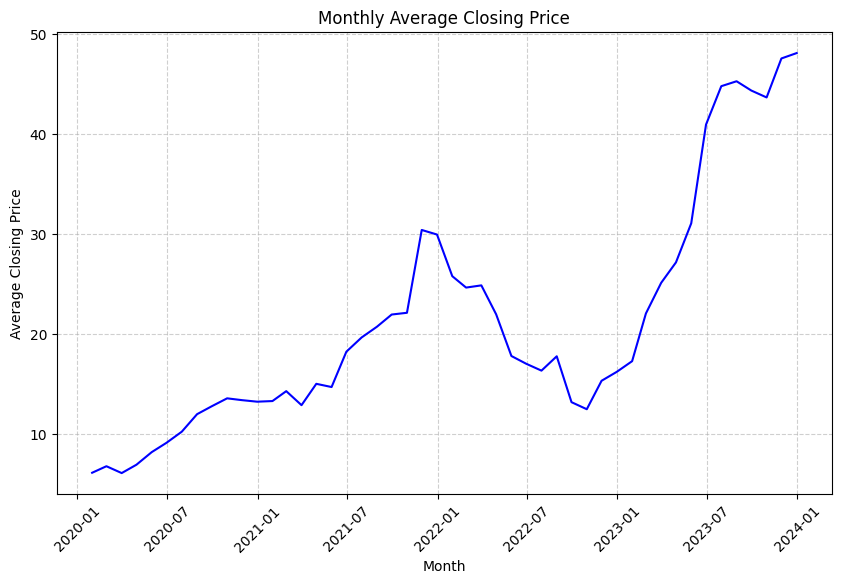

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=monthly_close_mean.index, y=monthly_close_mean.values, color='blue')
plt.title('Monthly Average Closing Price')
plt.ylabel('Average Closing Price')
plt.xlabel('Month')
plt.grid(visible=True, linestyle='--', alpha=0.6)
# sns.despine()
plt.xticks(rotation=45)
plt.show()

In [20]:
# daily frequency to weekends
# df.asfreq('D', method='pad')

# to add date if not
# rng=pd.date_range(start='2/1/2020', end='29/12/2023', freq='B)
# 'B' is business days


## Price trend over time

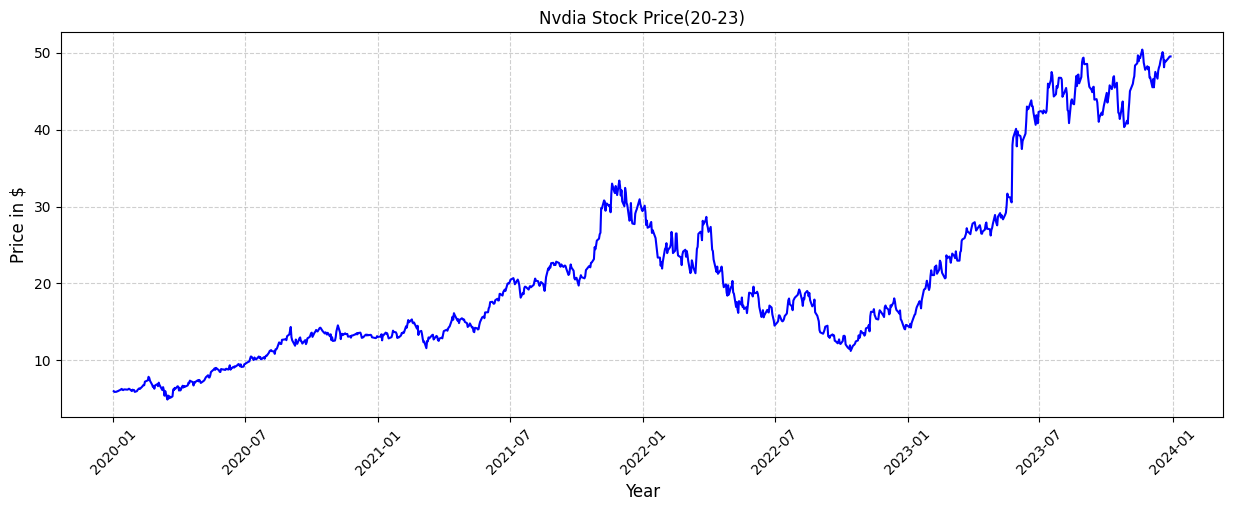

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(y=df.Close, x=df.index, color='blue')
plt.title('Nvdia Stock Price(20-23)')
plt.ylabel('Price in $', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)
# sns.despine()
plt.xticks(rotation=45)
plt.show()

In [22]:
# sns.set_theme()

## Data variation

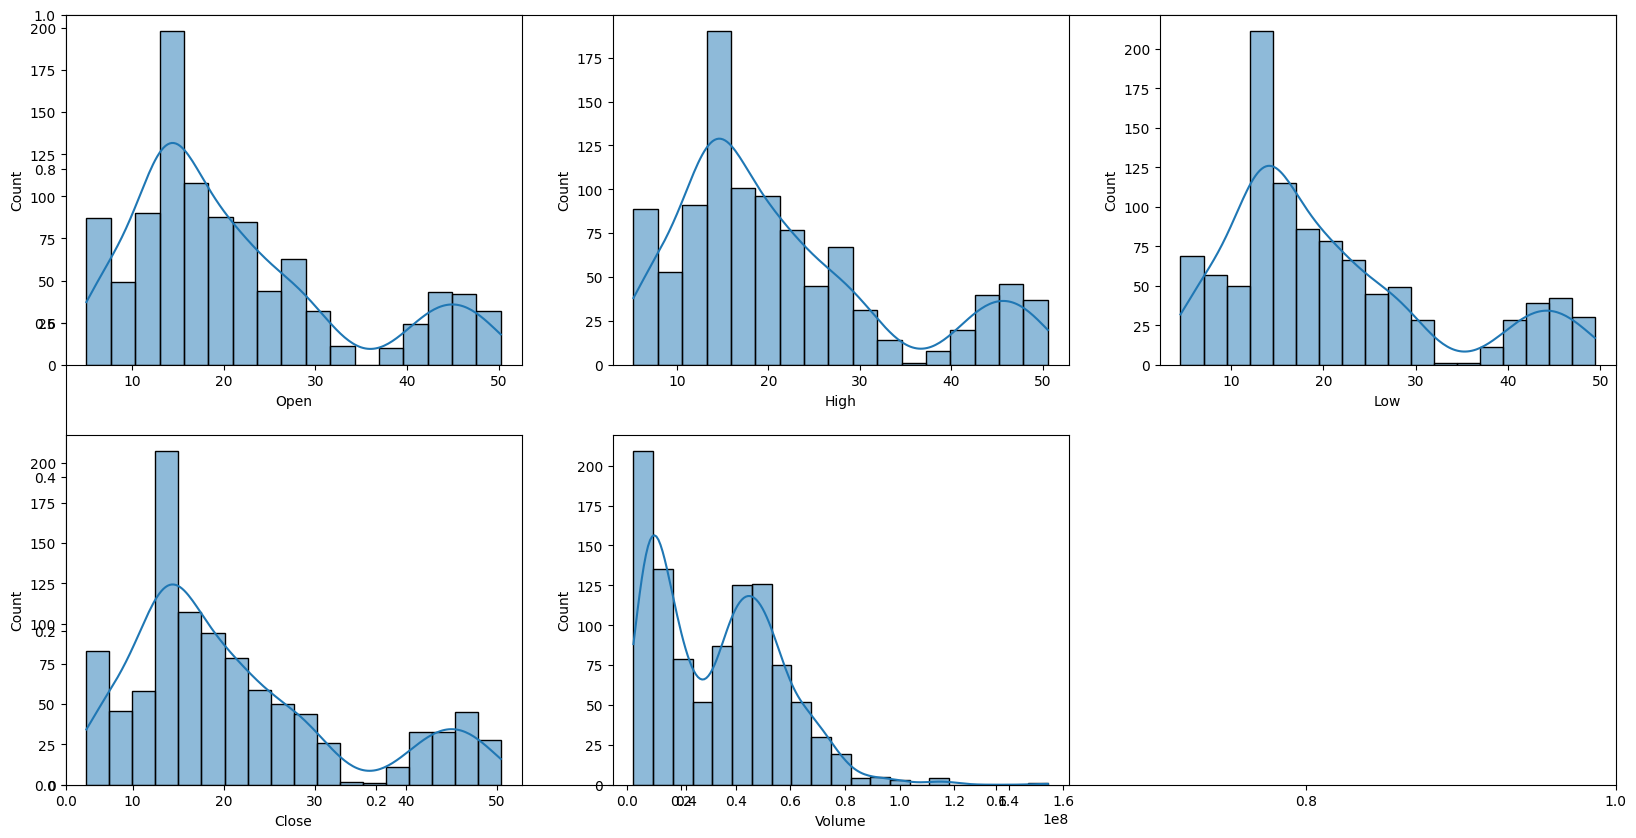

In [23]:
features=['Open','High','Low','Close','Volume'] # List
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1) #subplot uses 1 based indexing so i+1
  sns.histplot(df[col], kde=True)
plt.show()


In [24]:
# features=['Open','High','Low','Close','Volume']
# plt.subplots(figsize=(15,5))
# for i,col in enumerate(features):
#   plt.subplot(2,3,i+1) #subplot uses 1 based indexing so i+1
#   sns.distplot(df[col])
# plt.show()

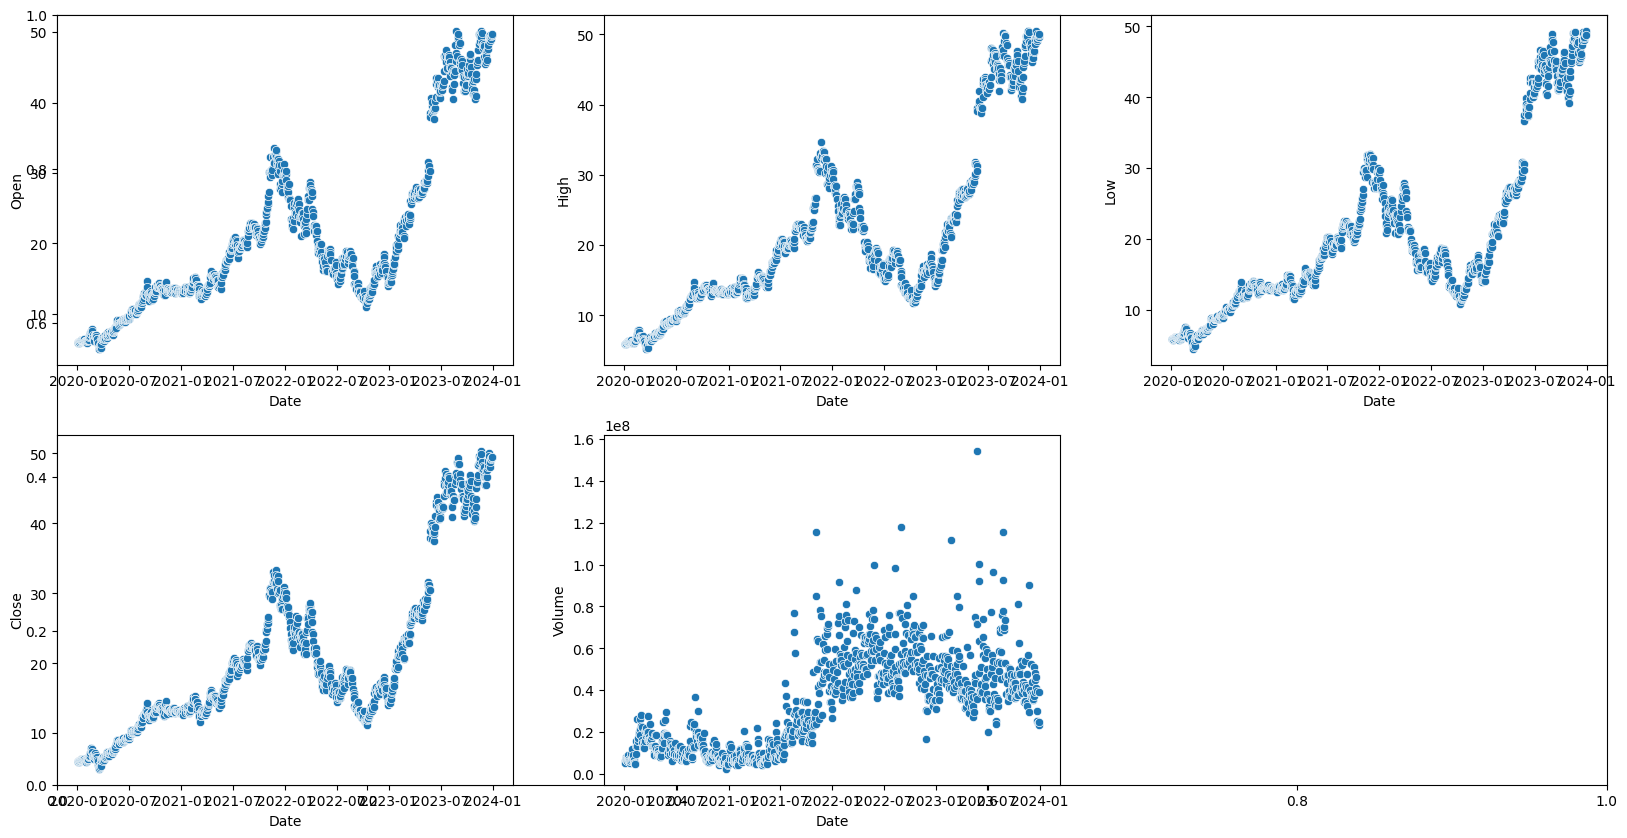

In [25]:
# features=['Open','High','Low','Close','Volume']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,3, i+1)
  sns.scatterplot(x=df.index, y=df[col])
plt.show()

## Removing outliers

In [26]:
# Capping at 5th and 95th percentiles
for col in ['Open', 'High', 'Low', 'Close']:
    lower_bound = df[col].quantile(0.5)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Feature Engineering

### Seperate columns for 'year', 'Month', 'Day'

In [27]:
#   in case Date was String

# df.reset_index(inplace=True)
# splitted_date=df['Date'].str.split('-', expand=True) # expand=True turns split to a column
# df['Year']=splitted_date[0].astype('int')
# df['Month']=splitted_date[1].astype('int')
# df['Day']=splitted_date[2].astype('int')

# df.set_index('Date', inplace=True)

In [28]:
df.reset_index(inplace=True)

df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

df.set_index('Date',inplace=True)

### Quater end months

In [29]:
# np.where(df['Month']%3==0, ifTrue, ifFalse)
df['Quarter_end']=np.where(df['Month']%3==0,1,0)

In [30]:
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Quarter_end
Date,,,,,,,,,
2020-01-02,17.515,17.93,17.06,17.61,5941969,2020,1,2,0
2020-01-03,17.515,17.93,17.06,17.61,5144308,2020,1,3,0
2020-01-06,17.515,17.93,17.06,17.61,6572812,2020,1,6,0
2020-01-07,17.515,17.93,17.06,17.61,7980144,2020,1,7,0
2020-01-08,17.515,17.93,17.06,17.61,6931017,2020,1,8,0


## Bar chart for yearly average values

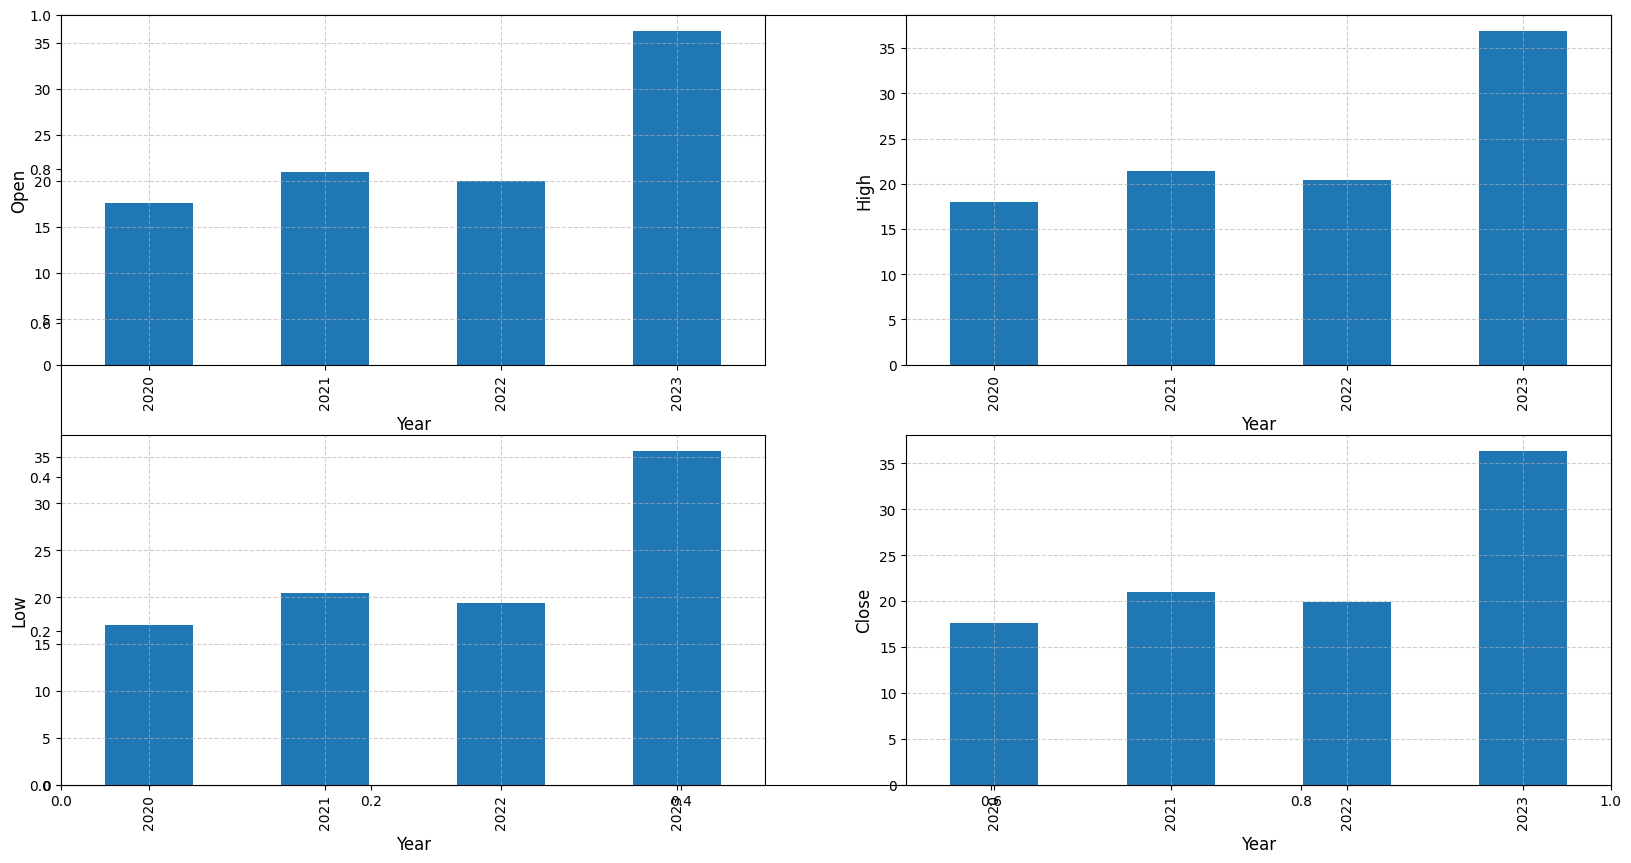

In [31]:
features=['Open','High','Low','Close']

# data_grouped = df.drop('Date', axis=1).groupby('year').mean() If Date is not index
# groups the DataFrame by the year extracted from the DatetimeIndex
df_grouped_by_year= df.groupby(df.index.year).mean()
# df.groupby creates a object containing Date.year
# and mean()


plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
  plt.subplot(2,2,i+1)
  df_grouped_by_year[col].plot(kind='bar')
  plt.xlabel("Year", fontsize=12)
  plt.ylabel(col, fontsize=12)
  plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.show()

### DataFrame grouped by year with yearly average values

In [32]:
df_grouped_by_year
#

,Open,High,Low,Close,Volume,Year,Month,Day,Quarter_end
Date,,,,,,,,,
2020,17.515000,17.930000,17.060000,17.610000,1.202491e+07,2020.0,6.545455,15.822134,0.343874
2021,20.951151,21.365992,20.496151,20.993889,2.107803e+07,2021.0,6.583333,15.674603,0.349206
2022,19.913187,20.398127,19.367410,19.942829,5.432220e+07,2022.0,6.549801,15.645418,0.342629
2023,36.237890,36.859720,35.573050,36.321090,4.736299e+07,2023.0,6.536000,15.816000,0.336000


## DataFrame grouped by Quater end months with average values

In [33]:
df.groupby('Quarter_end').mean()

,Open,High,Low,Close,Volume,Year,Month,Day
Quarter_end,,,,,,,,
0,23.287201,23.773389,22.758071,23.351218,3.389815e+07,2021.500756,6.107413,15.706505
1,24.277761,24.757014,23.746688,24.337848,3.310988e+07,2021.484058,7.408696,15.802899


## Adding more Columns

In [34]:
df['Open-Close']=df['Open']-df['Close']
# A positive value indicates an uptrend, while a negative value indicates a downtrend
df['Low-High']=df['Low']-df['High']
# A larger difference indicates higher volatility, while a smaller difference indicates lower volatility.

df.head()


,Open,High,Low,Close,Volume,Year,Month,Day,Quarter_end,Open-Close,Low-High
Date,,,,,,,,,,,
2020-01-02,17.515,17.93,17.06,17.61,5941969,2020,1,2,0,-0.095,-0.87
2020-01-03,17.515,17.93,17.06,17.61,5144308,2020,1,3,0,-0.095,-0.87
2020-01-06,17.515,17.93,17.06,17.61,6572812,2020,1,6,0,-0.095,-0.87
2020-01-07,17.515,17.93,17.06,17.61,7980144,2020,1,7,0,-0.095,-0.87
2020-01-08,17.515,17.93,17.06,17.61,6931017,2020,1,8,0,-0.095,-0.87


# Target column
## 0 or 1 if the closing price of the next day is greater than the current day's closing price

In [35]:
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [36]:
df.head()

,Open,High,Low,Close,Volume,Year,Month,Day,Quarter_end,Open-Close,Low-High,target
Date,,,,,,,,,,,,
2020-01-02,17.515,17.93,17.06,17.61,5941969,2020,1,2,0,-0.095,-0.87,0
2020-01-03,17.515,17.93,17.06,17.61,5144308,2020,1,3,0,-0.095,-0.87,0
2020-01-06,17.515,17.93,17.06,17.61,6572812,2020,1,6,0,-0.095,-0.87,0
2020-01-07,17.515,17.93,17.06,17.61,7980144,2020,1,7,0,-0.095,-0.87,0
2020-01-08,17.515,17.93,17.06,17.61,6931017,2020,1,8,0,-0.095,-0.87,0


In [37]:
df[df['target']==1]

,Open,High,Low,Close,Volume,Year,Month,Day,Quarter_end,Open-Close,Low-High,target
Date,,,,,,,,,,,,
2021-06-04,17.5150,17.93,17.1000,17.61,15428007,2021,6,4,1,-0.0950,-0.8300,1
2021-06-10,17.5150,17.93,17.1800,17.61,7194261,2021,6,10,1,-0.0950,-0.7500,1
2021-06-11,17.5150,17.94,17.4400,17.83,10407691,2021,6,11,1,-0.3150,-0.5000,1
2021-06-15,17.9200,18.02,17.7300,17.79,6075761,2021,6,15,1,0.1300,-0.2900,1
2021-06-16,17.7900,17.95,17.5800,17.81,7678065,2021,6,16,1,-0.0200,-0.3700,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,44.0200,45.31,43.7200,45.01,42460959,2023,11,3,0,-0.9900,-1.5900,1
2023-11-06,45.2800,45.94,44.9000,45.75,40073335,2023,11,6,0,-0.4700,-1.0400,1
2023-11-07,45.7200,46.22,45.1600,45.96,34316547,2023,11,7,0,-0.2400,-1.0600,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1006 non-null   float64
 1   High         1006 non-null   float64
 2   Low          1006 non-null   float64
 3   Close        1006 non-null   float64
 4   Volume       1006 non-null   int64  
 5   Year         1006 non-null   int32  
 6   Month        1006 non-null   int32  
 7   Day          1006 non-null   int32  
 8   Quarter_end  1006 non-null   int64  
 9   Open-Close   1006 non-null   float64
 10  Low-High     1006 non-null   float64
 11  target       1006 non-null   int64  
dtypes: float64(6), int32(3), int64(3)
memory usage: 90.4 KB


## Confuion matrix to visulaise corelation
### as these are highly corelated features

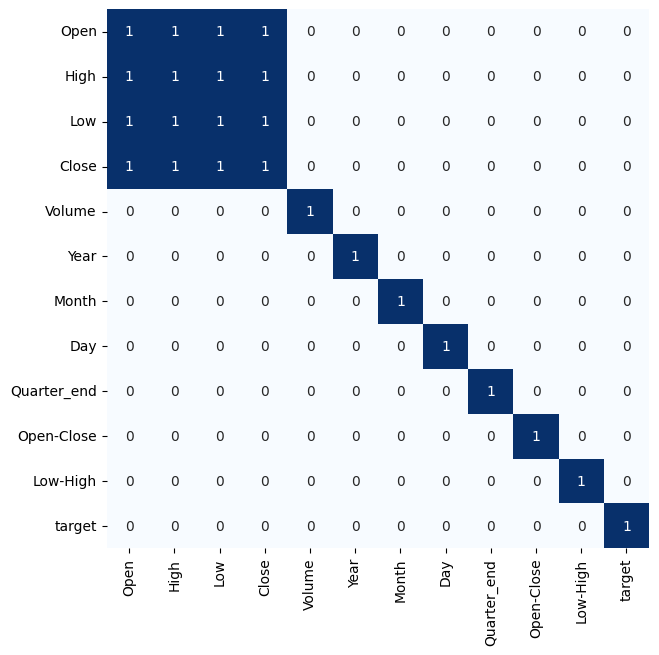

In [39]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False, cmap='Blues', cbar_kws={"shrink": 0.8, "aspect": 30} )
plt.show()



# Getting Data Ready for the Model

### Importing libraries

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

## Data Splitting

In [41]:

features = df[['Open-Close', 'Low-High', 'Quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)


X_train, X_test, y_train, y_test =train_test_split(features, target, train_size=0.9, random_state=2022)
print(X_train.shape, X_test.shape)




(905, 3) (101, 3)


# Training and Assessing Models

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]

for i in range(5):
    models[i].fit(X_train, y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(
        y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        y_test, models[i].predict_proba(X_test)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5158593231585933
Validation Accuracy :  0.5322896281800391

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.6619508958195089
Validation Accuracy :  0.5768101761252447

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

## RandomForestClassifier performed the best

In [43]:
print(models[3])

RandomForestClassifier()


In [44]:
best_model=models[3]

### Input ['Open-Close', 'High-Low', 'Quater_End'] model predicts 66% chances next day closing price will be higher.

In [45]:
best_model.predict(scaler.fit_transform([[-0.095,-0.87, 0]]))

array([1])

In [46]:
best_model.predict_proba(scaler.fit_transform([[-0.095,-0.87, 0]]))

array([[0.33964744, 0.66035256]])

## Saving the model

In [47]:
import joblib

In [48]:
joblib.dump(best_model, 'Stock_Price_Predictor.pkl')

['Stock_Price_Predictor.pkl']

## Loading the model


In [50]:
# file path
load_model=joblib.load('/content/drive/MyDrive/Stock_Price_Predictor.pkl')